In [1]:
import altair as alt
import numpy as np
import pandas as pd

# %config InlineBackend.figure_format = 'retina'

# alt.renderers.enable('notebook') ### !! uncomment this line for notebook

### Test Plotting with Altair
Easy to include tooltips

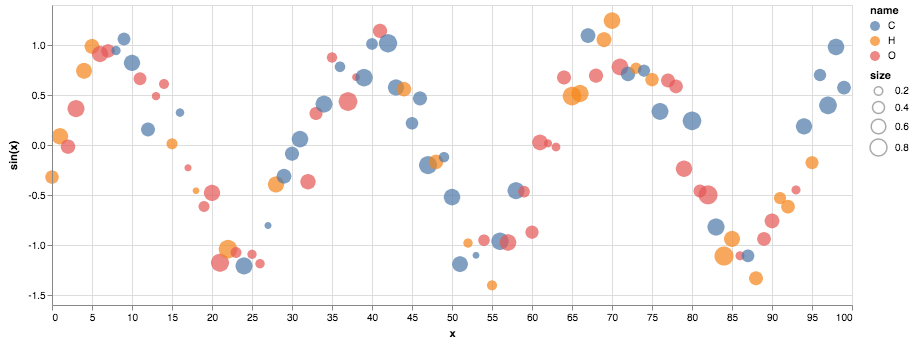

In [2]:
x = np.arange(100)
data = pd.DataFrame({
    'x': x,
    'sin(x)': np.sin(x / 5) + np.random.normal(0.0, 0.25, x.shape),
    'number': np.random.choice(['1', '2', '3'], x.shape),
    'name': np.random.choice(['C', 'O', 'H'], x.shape),
    'type': np.random.choice(['a', 'b', 'c'], x.shape),
    'size': np.random.uniform(0.1, 1.0, x.shape)
})

alt.Chart(data, width=800, height=300).mark_circle(size=60).encode(
    x='x',
    y='sin(x)',
    color='name',
    size='size',
    tooltip=['number', 'name', 'type']
)

In [10]:
sample = np.random.rand(250)
test   = np.random.rand(100)

sample_df = pd.DataFrame({
    'x': sample,
    'y': 1 - sample**2 + np.random.normal(0.0, 0.1, sample.shape),
    'mean': 1 - sample**2
})

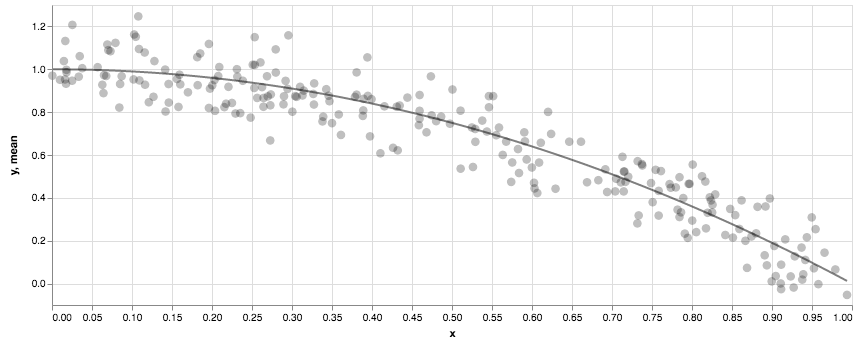

In [4]:
sample_plot = alt.Chart(sample_df, width=800, height=300).mark_circle(size=75, color='black').encode(
    x='x',
    y='y',
    opacity=alt.value(0.25),
)

mean_plot = alt.Chart(sample_df, width=800, height=300).mark_line(color='black').encode(
    x='x',
    y='mean',
    opacity=alt.value(0.5),
)

sample_plot + mean_plot

In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [6]:
lr.fit(np.array(sample_df['x']).reshape(-1,1), sample_df['y'])

/anaconda3/envs/rocketsled/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
test_df = pd.DataFrame({
    'x': test,
    'y': 1 - test**2,
    'pred': lr.predict(np.array(test).reshape(-1,1)),
})

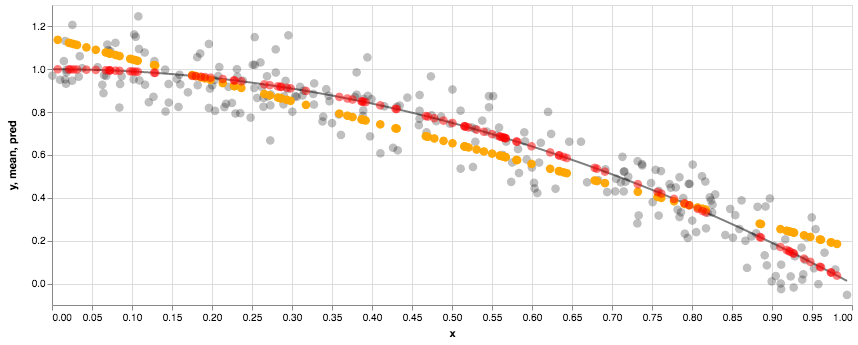

In [8]:
test_plot = alt.Chart(test_df, width=800, height=300).mark_circle(size=75, color='orange').encode(
    x='x',
    y='pred',
    opacity=alt.value(0.95),
)

test_plot2 = alt.Chart(test_df, width=800, height=300).mark_circle(size=75, color='red').encode(
    x='x',
    y='y',
    opacity=alt.value(0.5),
)

sample_plot + mean_plot + test_plot + test_plot2

In [9]:
lr.score(np.array(test_df['x']).reshape(-1,1), test_df['y'])

0.9277809464230955